#Introduction


Great! Hope that you have a good overview of how to build a basic artificial neural network in Keras. In this assignment, you'll build your own neural network to classify images of the fashion MNIST dataset

#The Fashion MNIST Dataset

The fashion MNIST dataset is a dataset containing 70000 pictures of different clothing items. Each picture is a 28 x 28 pixel image, and belongs to one of 10 differnt classes. The dataset contains 60000 pictures for training and 10000 pictures for testing

Each training and test example is assigned to one of the following labels:

0:	T-shirt/top

1:	Trouser

2:	Pullover

3:	Dress

4:	Coat

5:	Sandal

6:	Shirt

7:	Sneaker

8:	Bag

9:	Ankle boot

Please go through this link to understand the dataset better:
https://github.com/zalandoresearch/fashion-mnist

# Loading the Fashion MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

A couple of datasets can easily be loaded into numpy arrays from keras, fashion MNIST being one of them. To store them we simply do the following:

In [2]:
import tensorflow as tf
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#X_train[10,:,:]

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


We see that the training data has 60000 examples with each picture being a 28 x 28 image. So the entire training data is stored as a 60000 x 28 x 28 numpy array. Similary, the test set has 10000 examples



# Visualizing some of the images

To represent the matrix of pixels as an image, we use the matplotlib *imshow()* function. Feel free to change the range of images and see the images of the test set too

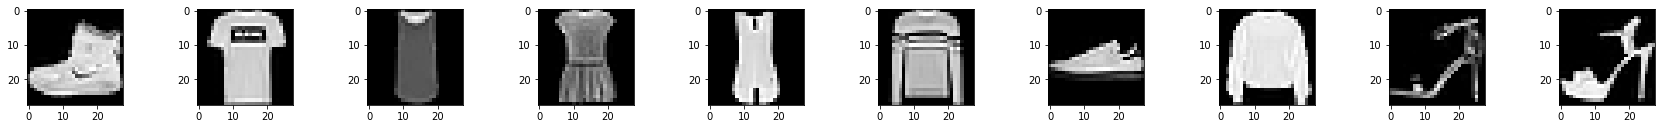

In [4]:
n = 10  
plt.figure(figsize=(30,6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.gray()
    plt.imshow(X_train[i])

# **Data Preprocessing**

##Reshaping the matrices

Each training and testing example is a 28 x 28 matrix. The entire dataset is a 3 dimensional numpy array. However, to train the dataset as a whole in an ANN, we need a 2 dimensional array. Reshape X_train and X_test so that they are 2 dimensional, with number of rows being intact. The number of columns has to be set by you. (Hint: 28 x 28 image has to be reshaped into one dimension)

In [5]:
X_train = np.reshape(X_train , (60000,784,))
X_test = np.reshape(X_test , (10000,784,))
#X_train[10,:]

##Normalizing the data

Previously we used standardization of data, which is performing the mathematical operation $$\frac{X-\mu}{\sigma}$$ on each feature.

Now we will be *normalizing data* which is equivalent to performing the mathematical operation $$ \frac{X - X_{min}}{X_{max} - X_{min}} $$ on each feature.

Use scikit learn's MinMaxScaler to normalize the data. Feel free to Google the answer.

In [6]:
"""Normalization of data. Your code goes below"""

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## One hot encoding of labels

In [7]:
"""Now convert both y_train and y_test into their one hot encodings. Your code goes below"""
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


#**MAKING THE NEURAL NETWORK MODEL**

We now leave the task of making an appropriate neural network model upto you. Use the Sequential model and tweak the number of layers, number of neurons, regularization , dropout rate and other stuff until you get a fairly accurate model. Remember to solve overfitting as much as possible.

In [8]:
tf.keras.backend.clear_session()

"""Your neural network model goes below"""
Model = tf.keras.Sequential()
Model.add(tf.keras.Input(shape= 784))
Model.add(tf.keras.layers.Dense(units= 128, activation='relu'))
Model.add(tf.keras.layers.Dense(units= 128, activation='tanh'))
Model.add(tf.keras.layers.Dense(units=10, activation= 'softmax'))
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""Use the compile() method to compile your model"""
Model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics = ['accuracy'])


In [10]:
"""Fit the model using the fit() method and store it in a variable"""
keras_history = Model.fit(X_train, y_train, batch_size= 32, epochs= 50, validation_data= (X_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 164us/sample - loss: 0.4700 - accuracy: 0.8277 - val_loss: 0.4096 - val_accuracy: 0.8471
Epoch 2/50
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3553 - accuracy: 0.8697 - val_loss: 0.3996 - val_accuracy: 0.8544
Epoch 3/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3207 - accuracy: 0.8812 - val_loss: 0.3638 - val_accuracy: 0.8654
Epoch 4/50
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2981 - accuracy: 0.8878 - val_loss: 0.3530 - val_accuracy: 0.8666
Epoch 5/50
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2809 - accuracy: 0.8952 - val_loss: 0.3191 - val_accuracy: 0.8827
Epoch 6/50
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2668 - accuracy: 0.8997 - val_loss: 0.3410 - val_accuracy: 0.8715
Epoch 7/50
60000/60000 [===========================

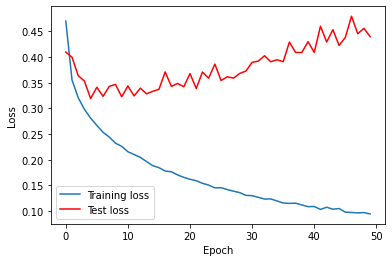

In [11]:
"""Plot the training loss, test loss withe each epoch"""
plt.plot(keras_history.history['loss'], label= 'Training loss')
plt.plot(keras_history.history['val_loss'], color = 'red', label= 'Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Text(0, 0.5, 'Accuracy')

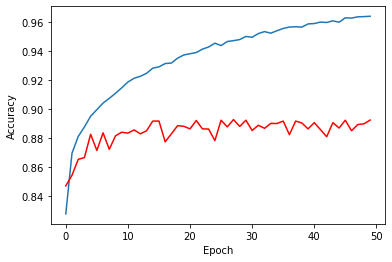

In [12]:
"""Plot the training accuracy, test accuracy with each epoch"""

plt.figure()
plt.plot(keras_history.history['accuracy'],label= 'training accuray')
plt.plot(keras_history.history['val_accuracy'], color= 'red', label= 'Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')



# NEURAL NETWORK WITH REGULARIZATION

Now make a neural network model with l2 regularization. Add batch normalization and see if it helps. Please name the Sequential model with something other than "model"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,794
Trainable params: 118,538
Non-trainable params: 256
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 162us/sample - loss: 0.7266 - accuracy: 0.8139 - val_loss: 0.7117 - val_accuracy: 0.7886
Epoch 2/50
60000/60000 [=====================

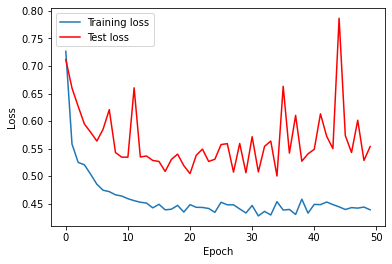

In [13]:
"""YOUR CODE GOES BELOW"""
tf.keras.backend.clear_session()


RegModel = tf.keras.Sequential()
# Input layer
RegModel.add(tf.keras.Input(shape= 784, ))

# Hidden Layer 1
RegModel.add(tf.keras.layers.Dense(units= 128, activation= 'relu', activity_regularizer=tf.keras.regularizers.l2(0.01)))
RegModel.add(tf.keras.layers.BatchNormalization())

# Hidden layer 2
RegModel.add(tf.keras.layers.Dense(units= 128, activation='tanh', activity_regularizer= tf.keras.regularizers.l2(0.01)))

# Hidden layer 3 / Output layer
RegModel.add(tf.keras.layers.Dense(units= 10, activation= 'softmax', activity_regularizer= tf.keras.regularizers.l2(0.01)))

RegModel.summary()



# Compiling model and fitting on training data (X_train,y_train) + cv_set (X_test,y_test)
RegModel.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics = ['accuracy'])
keras_history = RegModel.fit(X_train, y_train, batch_size= 32, epochs= 50, validation_data= (X_test, y_test))

plt.plot(keras_history.history['loss'], label= 'Training loss')
plt.plot(keras_history.history['val_loss'], color = 'red', label= 'Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# NEURAL NETWORK WITH DROPOUT 

Now implement the same neural network as above, but using dropout, and no regularization. Name the model differently.

In [14]:
"""YOUR CODE GOES BELOW"""
tf.keras.backend.clear_session()

dropRegModel = tf.keras.Sequential()
dropRegModel.add(tf.keras.Input(shape= 784))

dropRegModel.add(tf.keras.layers.Dense(units= 128, activation='relu'))
dropRegModel.add(tf.keras.layers.Dropout(0.3))

dropRegModel.add(tf.keras.layers.Dense(units= 128, activation='tanh'))
dropRegModel.add(tf.keras.layers.Dropout(0.1))

dropRegModel.add(tf.keras.layers.Dense(units=10, activation= 'softmax'))

dropRegModel.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 189us/sample - loss: 0.6862 - accuracy: 0.7606 - val_loss: 0.5170 - val_accuracy: 0.8057
Epoch 2/50
60000/60000 [==============================] - 11s 185us/sample - loss: 0.4882 - accuracy: 0.8257 - val_loss: 0.4398 - val_accuracy: 0.8397
Epoch 3/50
60000/60000 [==============================] - 11s 179us/sample - loss: 0.4421 - accuracy: 0.8406 - val_loss: 0.4145 - val_accuracy: 0.8518
Epoch 4/50
60000/60000 [==============================] - 9s 149us/sample - loss: 0.4142 - accuracy: 0.8503 - val_loss: 0.4008 - val_accuracy: 0.8559
Epoch 5/50
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3948 - accuracy: 0.8574 - val_loss: 0.3897 - val_accuracy: 0.8609
Epoch 6/50
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3814 - accuracy: 0.8619 - val_loss: 0.3829 - val_accuracy: 0.8619
Epoch 7/50
60000/60000 [======================

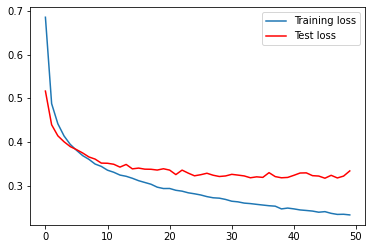

In [15]:
dropRegModel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

keras_history = dropRegModel.fit(X_train, y_train , batch_size=16, epochs=50, validation_data=(X_test, y_test))

plt.plot(keras_history.history['loss'], label='Training loss')
plt.plot(keras_history.history['val_loss'], color='red', label='Test loss')
plt.legend()

#USING COMBINATION OF DIFFERENT OVERFITTING TECHNIQUES

Now use different combinations of overfitting techniques to get a good test accuracy.

In [16]:
tf.keras.backend.clear_session()

ComboModel = tf.keras.Sequential()

ComboModel.add(tf.keras.Input(shape= 784))
ComboModel.add(tf.keras.layers.BatchNormalization())

ComboModel.add(tf.keras.layers.Dense(units= 512, activation='relu')
ComboModel.add(tf.keras.layers.Dropout(0.2))
ComboModel.add(tf.keras.layers.BatchNormalization())

ComboModel.add(tf.keras.layers.Dense(units= 10, activation= 'softmax', activity_regularizer= 
tf.keras.regularizers.l2(0.1)))

ComboModel.summary()



SyntaxError: invalid syntax (<ipython-input-16-5acb219e0027>, line 9)

In [17]:
opt = tf.keras.optimizers.SGD(0.01)
ComboModel.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

keras_history = ComboModel.fit(X_train, y_train , batch_size=16, epochs=10, validation_data=(X_test, y_test))



NameError: name 'ComboModel' is not defined

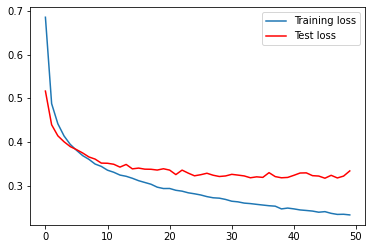

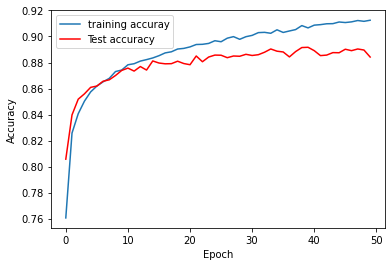

In [18]:
plt.figure()
plt.plot(keras_history.history['loss'], label='Training loss')
plt.plot(keras_history.history['val_loss'], color='red', label='Test loss')
plt.legend()

plt.figure()
plt.plot(keras_history.history['accuracy'],label= 'training accuray')
plt.plot(keras_history.history['val_accuracy'], color= 'red', label= 'Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [19]:
# Make Predictions
probability_model = tf.keras.Sequential([ComboModel,                                      tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

NameError: name 'ComboModel' is not defined

Great! Hope you had fun playing around with the neural network. With this you've come to the end of the artificial neural networks section. Note that there are different types of neural networks, with each performing well in different areas.

Happy Learning!